In [ ]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [ ]:
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [ ]:
#checking type and value count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#checking the statistical aspects of the data
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
#more statistical information about categorical features  
df.describe(include="O") 

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
#checking missing value in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
#checking number of unique elements in the column
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [24]:
#plotting numerical columns

num_cols = df.select_dtypes(exclude = 'object')
num_cols.columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [25]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.columns

Index(['sex', 'smoker', 'region'], dtype='object')

<Figure size 1080x432 with 0 Axes>

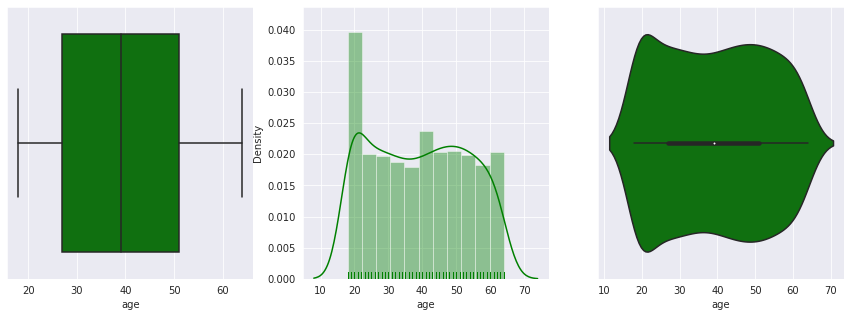

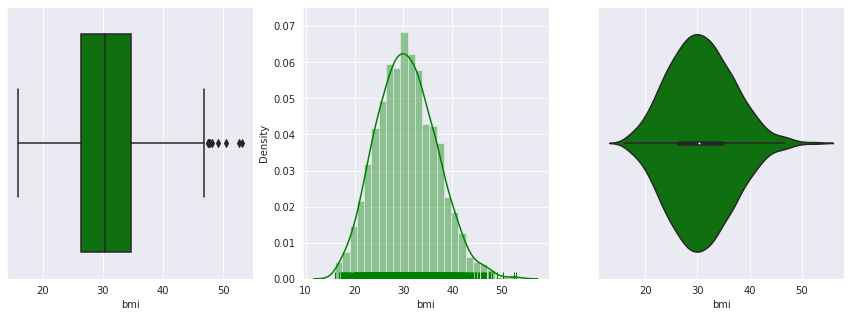

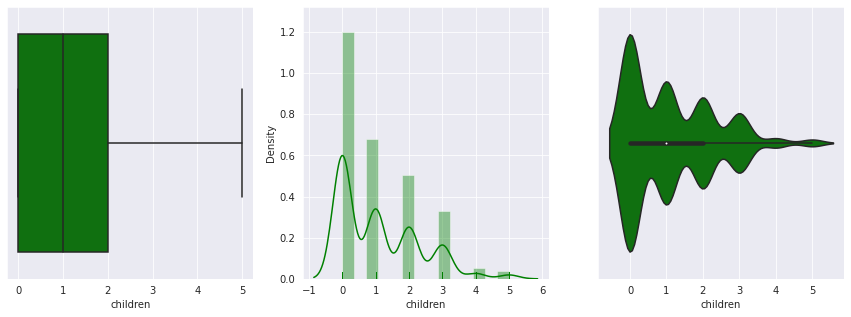

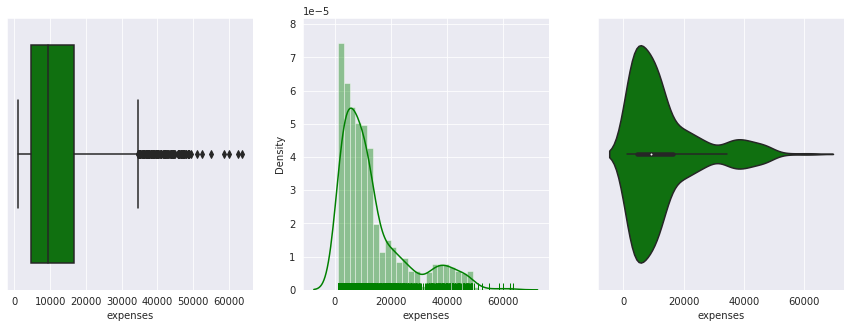

In [26]:
%matplotlib inline
#%pylab
plt.figure(figsize = (15,6))
f_num = num_cols.columns[:]

for i in enumerate(f_num):
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(131)
  sns.boxplot(num_cols[i[1]], color='Green')

  ax1 = f.add_subplot(132)
  sns.distplot(num_cols[i[1]], rug = True, color='Green')

  ax2 = f.add_subplot(133)
  sns.violinplot(num_cols[i[1]], orient = 'vertical', color='Green')

  plt.show()


<Figure size 1080x720 with 0 Axes>

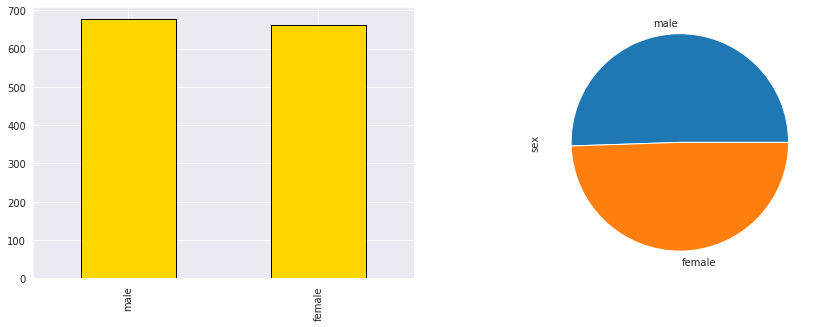

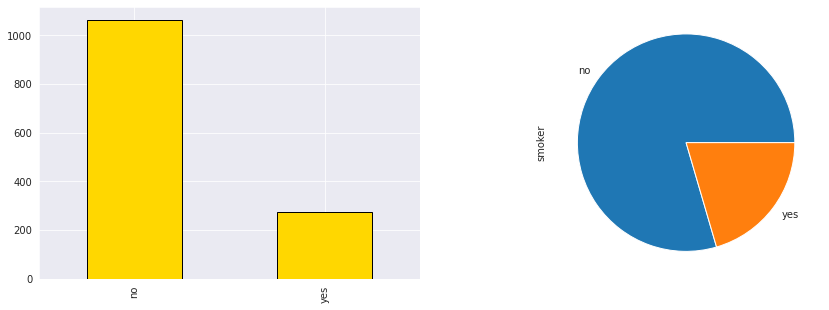

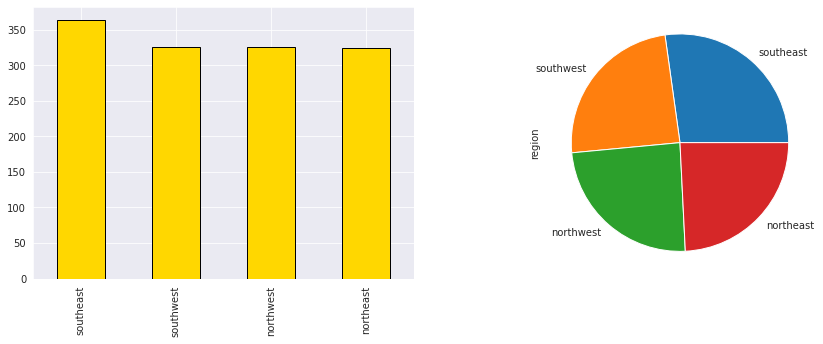

In [29]:
%matplotlib inline
plt.figure(figsize = (15,10))

f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):

  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(121)
  cat_cols[i[1]].value_counts().plot.bar(color='gold', edgecolor='Black')
  
  ax1 = f.add_subplot(122)
  cat_cols[i[1]].value_counts().plot.pie()
  
  plt.show()


In [30]:
#detecting outliers

df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [31]:
for i in num_cols.columns:
  print(i)
  print(num_cols[i].quantile([0.1,0.9,0.95,0.99]))

age
0.10    19.0
0.90    59.0
0.95    62.0
0.99    64.0
Name: age, dtype: float64
bmi
0.10    23.000
0.90    38.630
0.95    41.100
0.99    46.389
Name: bmi, dtype: float64
children
0.10    0.0
0.90    3.0
0.95    3.0
0.99    5.0
Name: children, dtype: float64
expenses
0.10     2346.5350
0.90    34831.7160
0.95    41181.8260
0.99    48537.4806
Name: expenses, dtype: float64


In [32]:
#DV 
#bivariate analysis of numerical columns wrt to target column expenses

<Figure size 1080x720 with 0 Axes>

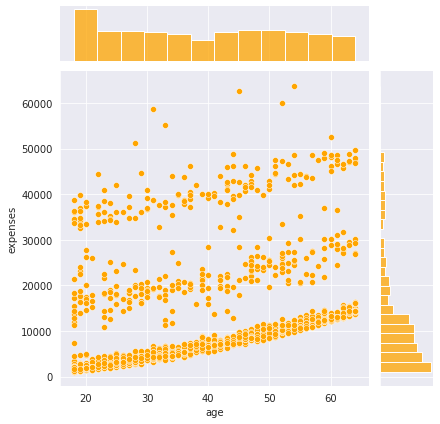

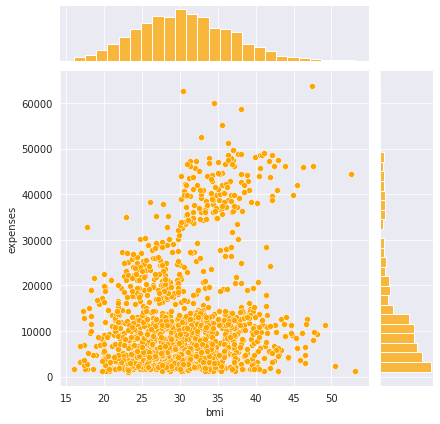

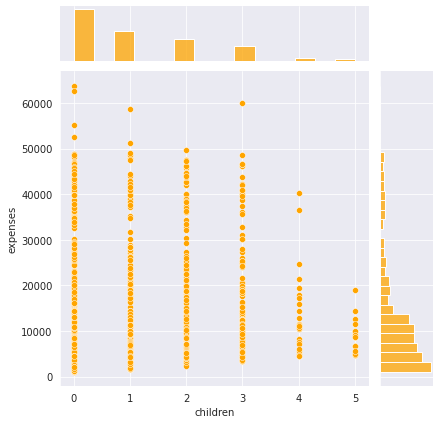

In [34]:
%matplotlib inline
plt.figure(figsize = (15,10))

f_num = num_cols.columns[:-1]
for i in enumerate(f_num):
  sns.jointplot(num_cols[i[1]], y = df.expenses, color = 'Orange', kind = 'scatter')
  plt.show()

<Figure size 1080x432 with 0 Axes>

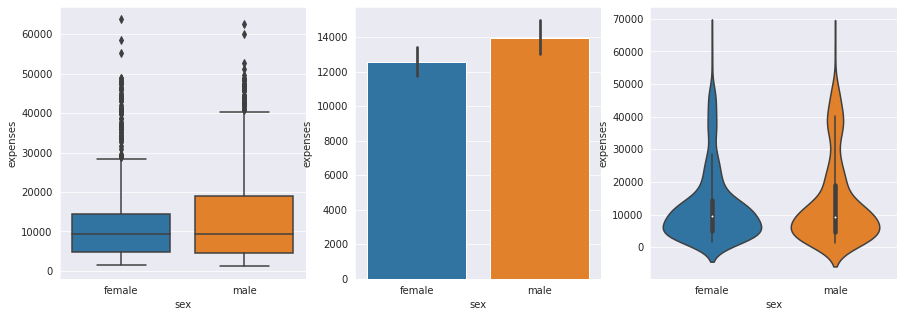

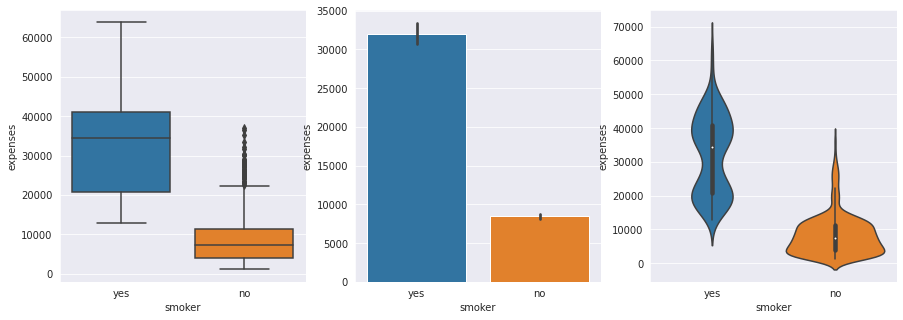

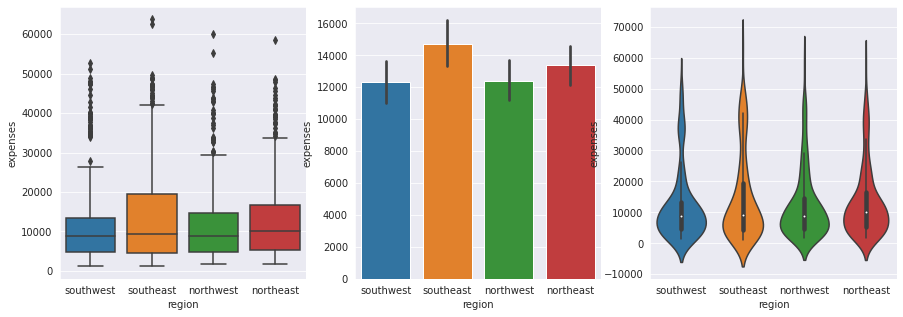

In [35]:
#Bivariate analysis of categorical columns wrt Expenses
%matplotlib inline
#%pylab
plt.figure(figsize = (15,6))
f_cat = cat_cols.columns[:]

for i in enumerate(f_cat):
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(131)
  sns.boxplot(x = cat_cols[i[1]], y = df.expenses)

  ax1 = f.add_subplot(132)
  sns.barplot(x = cat_cols[i[1]], y = df.expenses)

  ax2 = f.add_subplot(133)
  sns.violinplot(x = cat_cols[i[1]], y = df.expenses, orient = 'vertical')

  plt.show()


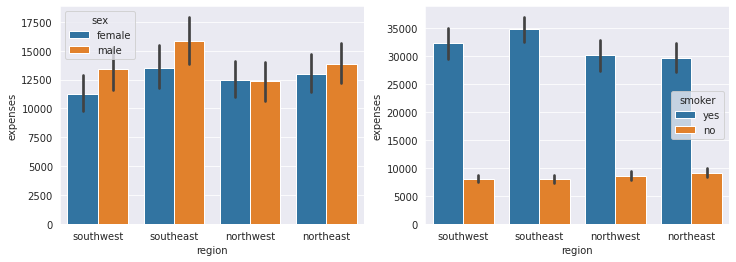

In [36]:
#Multivariate analysis
%matplotlib inline
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.barplot(df.region, df.expenses, hue= df.sex)

ax1 = f.add_subplot(122)
sns.barplot(df.region, df.expenses, hue = df.smoker)
plt.show()

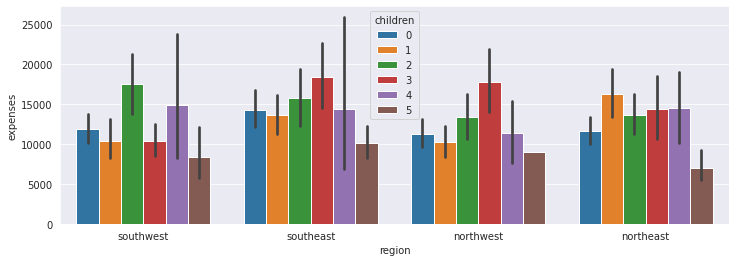

In [37]:
%matplotlib inline
f= plt.figure(figsize=(12,4))
sns.barplot(df.region, df.expenses, hue= df.children)
plt.show()


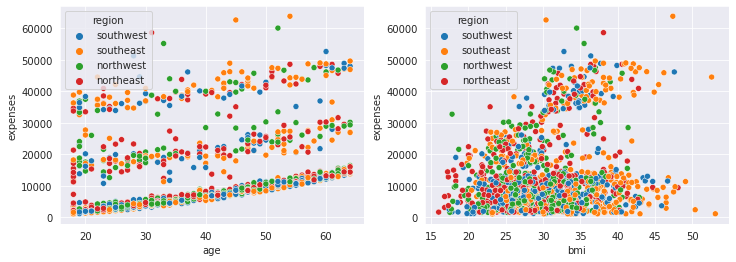

In [38]:
%matplotlib inline
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.scatterplot(df.age, df.expenses, hue= df.region)

ax1 = f.add_subplot(122)
sns.scatterplot(df.bmi, df.expenses, hue = df.region)
plt.show()

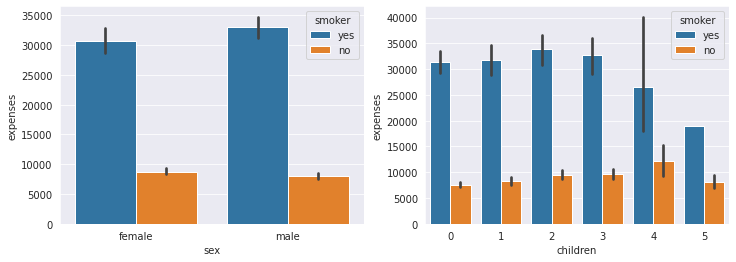

In [39]:
%matplotlib inline
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.barplot(df.sex, df.expenses, hue= df.smoker)

ax1 = f.add_subplot(122)
sns.barplot(df.children, df.expenses, hue = df.smoker)
plt.show()

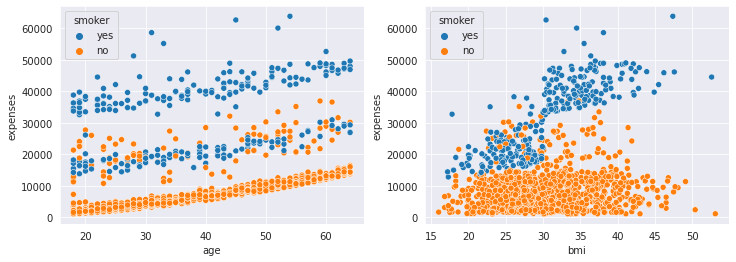

In [40]:
%matplotlib inline
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.scatterplot(df.age, df.expenses, hue= df.smoker)

ax1 = f.add_subplot(122)
sns.scatterplot(df.bmi, df.expenses, hue = df.smoker)
plt.show()

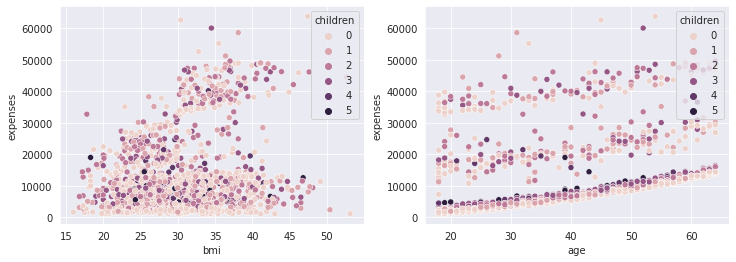

In [41]:
%matplotlib inline
f= plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
sns.scatterplot(df.bmi, df.expenses, hue= df.children)

ax2 = f.add_subplot(122)
sns.scatterplot(df.age, df.expenses, hue = df.children)
plt.show()

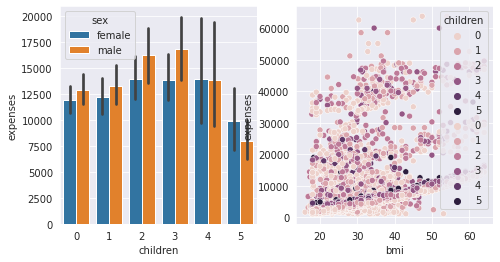

In [42]:
%matplotlib inline
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(131)
sns.barplot(df.children, df.expenses, hue= df.sex)

ax1 = f.add_subplot(132)
sns.scatterplot(df.bmi, df.expenses, hue = df.children)

ax2 = f.add_subplot(132)
sns.scatterplot(df.age, df.expenses, hue = df.children)

plt.show()

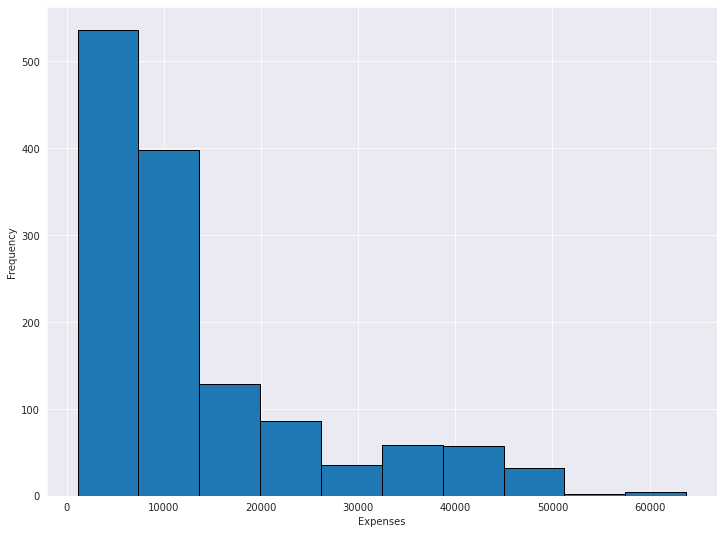

In [43]:
#checking Expenses
plt.figure(figsize = (12,9))
plt.hist(df['expenses'], edgecolor = 'Black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

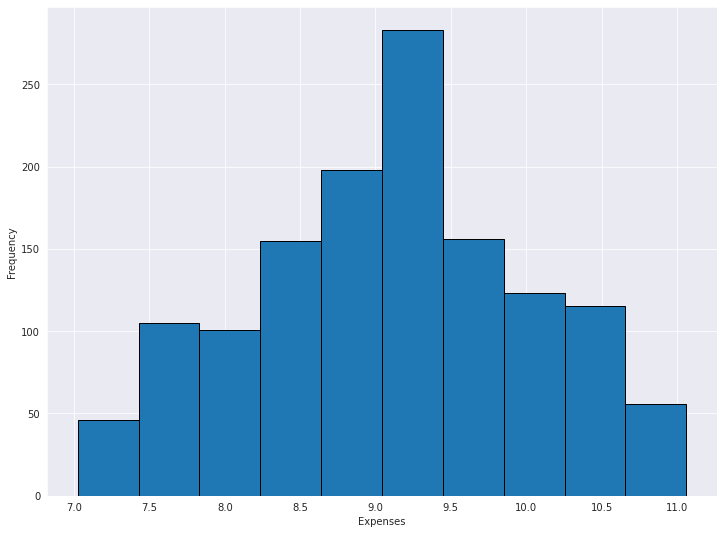

In [44]:
# using log transformation
df['expenses'] = np.log1p(df['expenses'])

# now plotting
plt.figure(figsize = (12,9))
plt.hist(df['expenses'], edgecolor = 'Black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

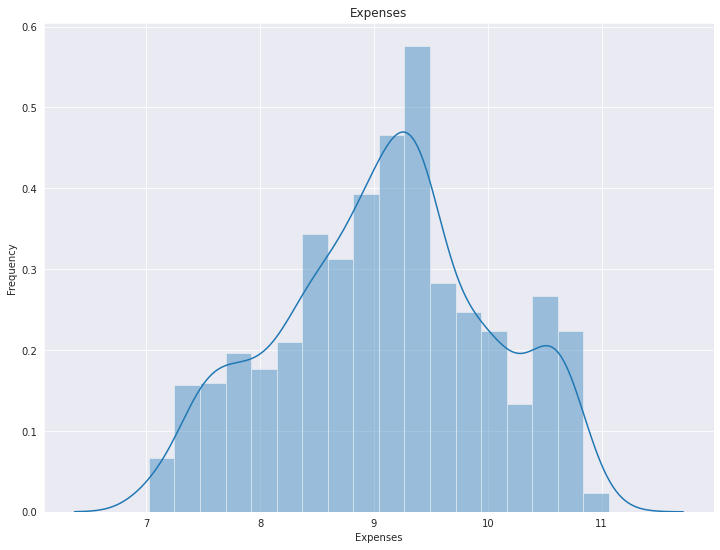

In [45]:
# distribution of errors

plt.figure(figsize = (12,9))

p = sns.distplot(df['expenses'], kde=True)

p = plt.title('Expenses')

plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

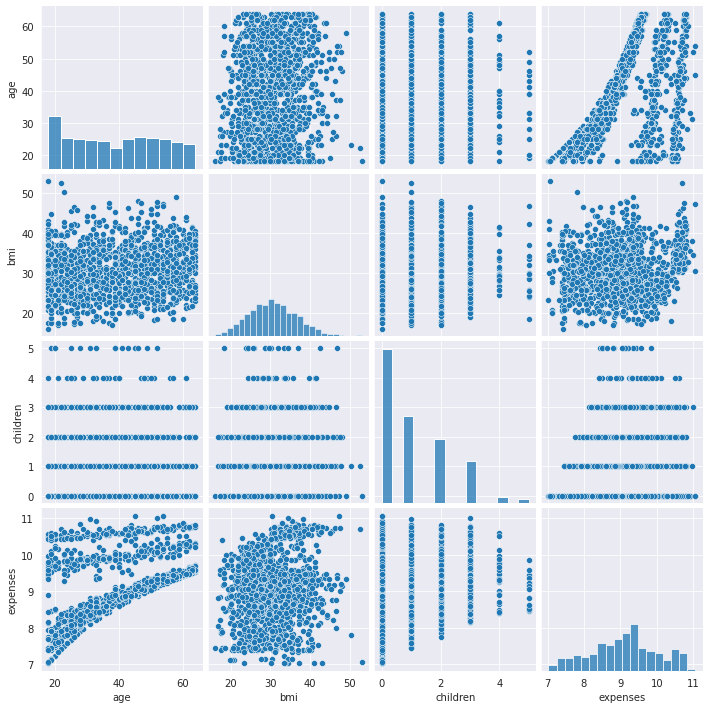

In [46]:
# Data Visualization
# Pair plot and Heatmap

sns.pairplot(df)
plt.show()

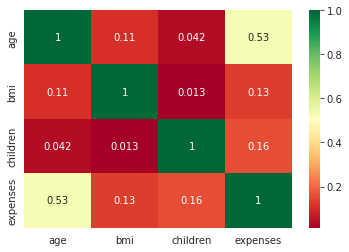

In [47]:
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

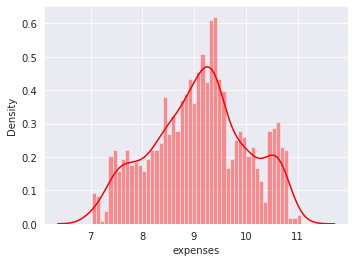

In [48]:
%matplotlib inline
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
#ax.set_title('Distribution of insurance expenses')

In [ ]:
# distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.
fig = px.histogram(df,x='bmi',marginal='box',color_discrete_sequence=['orange'],title='Distribustion of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [50]:
#visualize the distribution of "expenses" i.e. the annual medical expenses for customers
fig = px.histogram(df,x='expenses',marginal='box',color='smoker',color_discrete_sequence=['red', 'orange'],title="Annual Medical Expenses")
fig.update_layout(bargap=0.1)
fig.show()   

In [51]:
#visualizing the distribution of "expenses" with the categorical column "sex" to distinguish the expenses for "male" and "female"
fig = px.histogram(df,x="expenses",marginal="box",color="sex",color_discrete_sequence=["pink", "skyblue"],title="Annual Medical Expenses by Sex")
fig.update_layout(bargap=0.1)
fig.show()


In [52]:
# visualizing the distribution of "expenses" with categorical column "region" to distinguish expenses for southwest, southeast, northwest and northeast.
fig = px.histogram(df,x="expenses",marginal="box",color="region",color_discrete_sequence=["grey", "orange", "green","violet"],title="Annual Medical Expenses by Region")
fig.update_layout(bargap=0.1)
fig.show()           

In [53]:
#visualizing the distribution of the "smoker" column (containing values "yes" and "no") using a histogram
px.histogram(df, x="smoker", color="sex", title="Smoker")

In [54]:
px.histogram(df, x="region", color="smoker", title="Region")

In [55]:
px.histogram(df, x="smoker", color="children", title="Smoker Vs Children")

In [56]:
#visualizing the relationship between "age" and "expenses" using a scatter plot
fig = px.scatter(df,
                x="age",
                y="expenses",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs Expenses")

fig.update_traces(marker_size=5)
fig.show() 

In [57]:
 #visualizing the relationship between BMI (body mass index) and expenses using another scatter plot
 fig = px.scatter(df,
                x="bmi",
                y="expenses",
                color="smoker",
                hover_data=['sex'],
                opacity=0.8,
                width=800,
                height=500,
                title="BMI Vs Expenses")

fig.update_traces(marker_size=5)
fig.show()  

In [58]:
fig = px.scatter(df,
                x="bmi",
                y="expenses",
                color="smoker",
                hover_data=['region'],
                opacity=0.9,
                width=800,
                height=500,
                title= "BMI Vs Expenses")

fig.update_traces(marker_size=5)
fig.show()   

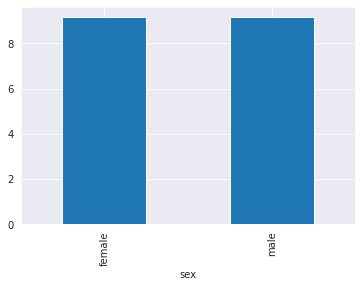

In [59]:
df.groupby("sex")['expenses'].median().plot.bar()
plt.show()

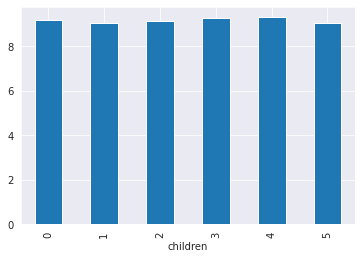

In [60]:
df.groupby("children")['expenses'].median().plot.bar()
plt.show()

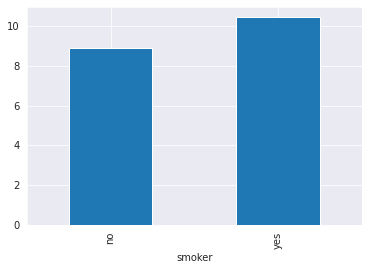

In [61]:
df.groupby("smoker")['expenses'].median().plot.bar()
plt.show()

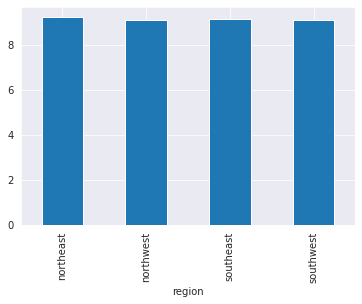

In [62]:
df.groupby("region")['expenses'].median().plot.bar()
plt.show()

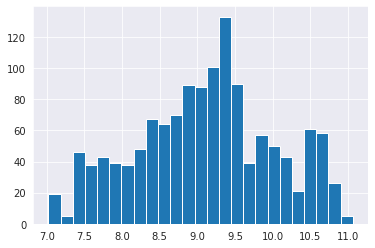

In [63]:
df['expenses'].hist(bins=25)
plt.show()

In [64]:
fig = px.histogram(data_frame=df, x='bmi', y='expenses', width=800, height=500, title='Expenses by BMI')
fig.show()


In [65]:
fig = px.histogram(df, x="bmi", y="expenses", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

In [66]:
fig = px.scatter(df, x="bmi", y="expenses", color='sex', facet_col="children")
fig.update_xaxes(matches=None)
fig.show()

In [67]:
fig = px.pie(data_frame=df, names='sex', values='expenses', width=800, height=500, title='Expenses by Gender')
fig.show()


In [68]:
fig = px.scatter(df, x="bmi", y="expenses", color="sex", width=900, height=500, title="Expenses by BMI & Gender")
fig.show()


In [69]:
fig = px.scatter(df, x="bmi", y="expenses", color="smoker", width=900, height=500, title="Expenses by BMI & Smoker")
fig.show()


In [70]:
fig = px.scatter(df, x="bmi", y="expenses", color="region", width=900, height=500, title="Expenses by BMI & Region")
fig.show()


In [71]:
fig = px.violin(df, y="expenses", x= "sex")
fig.show()

In [72]:
fig = px.violin(df, y="expenses", x= "smoker")
fig.show()

In [73]:
fig = px.scatter(df, x="bmi", y="expenses", color="sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [74]:
fig = px.scatter(df, x="bmi", y="expenses", color="smoker", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [75]:
fig = px.scatter(df, x="bmi", y="expenses", color="region", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [76]:
fig = px.box(df, x="children", y="expenses", color="smoker", notched=True, title= "Expenses by Children & Smoker")
fig.show()

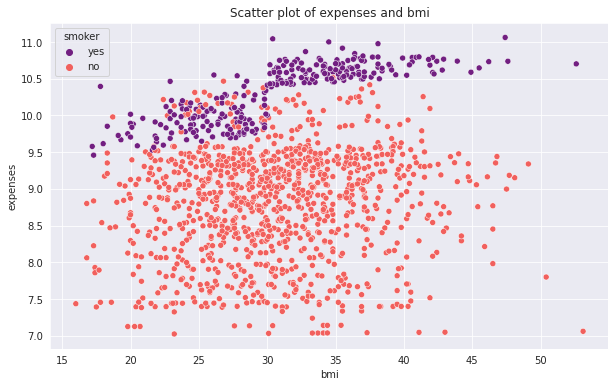

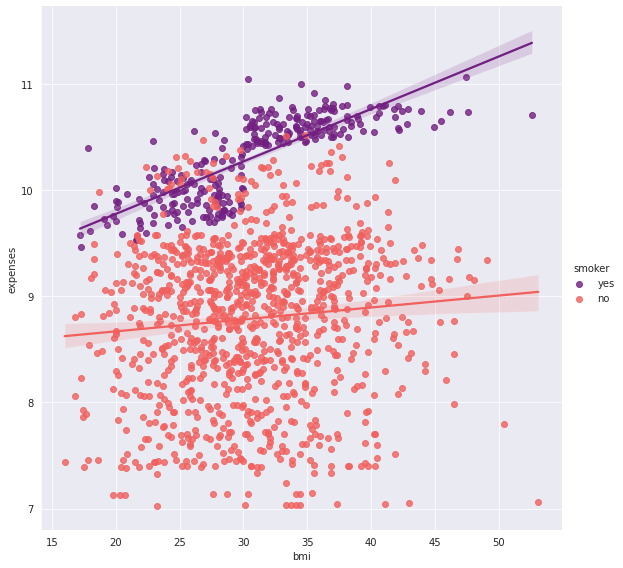

In [78]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of expenses and bmi')

sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df, palette = 'magma', size = 8)

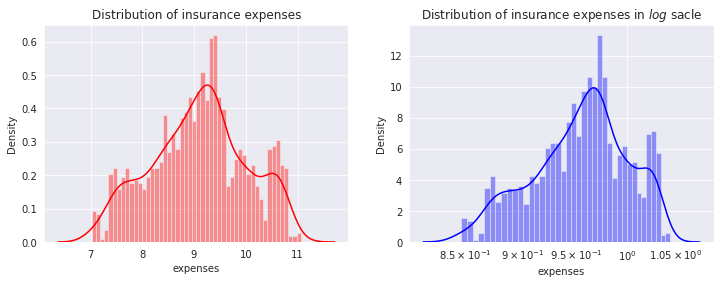

In [79]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the expenses varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.

In [82]:
X = df.drop(['expenses'], axis=1)
y = df['expenses']

In [83]:
# Saving the cleaned data
X.to_csv('clean_data.csv')

In [84]:
#The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.
# Creating new variables for numerical attributes/columns
numeric_features = ['age', 'bmi', 'children']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [85]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)

(1070, 6) (268,)


In [87]:
linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :0.17550994363009464
The Root Mean Squared Error using Linear Regression :0.4189390691139878
The r2_score using Linear Regression :0.8047401359736779


In [88]:
score = []
for i in range(1000):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=i)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(r2_score(y_test, y_pred))

In [89]:
np.argmax(score)

461

In [90]:
score[np.argmax(score)]

0.8487111126714456

In [91]:
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 0.2202031445046453
The Root Mean Squared Error using Decision Tree Regressor : 0.4042818072190265
The r2_score using Decision Tree Regressor : 0.803406565860106


In [92]:
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42))])
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 0.15664163430594175
The Root Mean Squared Error using Random Forest Regressor : 0.395779780062021
The r2_score Error using Random Forest Regressor : 0.8115883217840515


In [93]:
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=30, max_depth=4, min_samples_split=5,random_state=42))])
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 0.15744256315374627
The Root Mean Squared Error using Random Forest Regressor : 0.3967903264367042
The r2_score Error using Random Forest Regressor : 0.8106249486105331


In [94]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor())])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 0.1516412922844913
The Root Mean Squared Error using Gradient Boosting Regressor : 0.3894114691229462
The r2_sccore using Gradient Boosting Regressor : 0.8176028327797368


In [95]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor(n_estimators=41, max_depth=3, min_samples_split=4, random_state=42))])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 0.15069543225715373
The Root Mean Squared Error using Gradient Boosting Regressor : 0.3881950956119278
The r2_sccore using Gradient Boosting Regressor : 0.8187405320631852


In [96]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

knn.fit(X_train, y_train)

# Predictiong The model
y_pred4 = knn.predict(X_test)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 0.20063242915790913
The root mean squared error using KNN is 0.4479201147056349
The r2_score using KNN is 0.7586753173913343


In [97]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,0.388195,0.818741
2,Random Forest,0.396790,0.810625
1,Decision Tree,0.404282,0.803407
0,Linear Regression,0.418939,0.804740
4,KNN,0.447920,0.758675


In [98]:
pickle.dump(gradient_boosting_reg, open('gradient_boosting_regressor_model.pkl', 'wb'))